# 1. graph.py

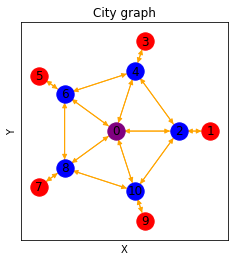

In [2]:
# import graph module
from sidermit.city import Graph

# symetric parameters
n=5 
L=10 #[Km]
g=0.5
P=2 #[Km]

# build city graph with simmetryc parameters
graph_obj = Graph.build_from_parameters(n, L, g, P)

# plot graph and save figure in a file_path
graph_obj.plot("sidermit_city.png")


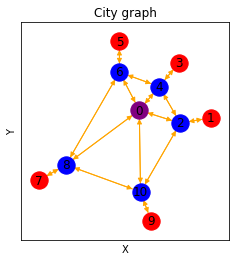

In [3]:
# symetric parameters
n=5 
L=10 #[km]
g=0.5
P=2 #[km]

# asymetric parameters
etha = 0.5
etha_zone = 2
angles = [10, 50, 90, 210, 290]
Gi = [1, 1, 1, 1, 1]
Hi = [1, 1, 1, 1, 1]

# build city graph with asimmetryc parameters
graph_obj = Graph.build_from_parameters(n, L, g, P, etha=etha, etha_zone=etha_zone, angles=angles, Gi=Gi, Hi=Hi)

# plot graph and save figure in a file_path
graph_obj.plot("sidermit_city.png")

# save graph in pajek file
graph_obj.graph_to_pajek("sidermit_city.PAJEK")

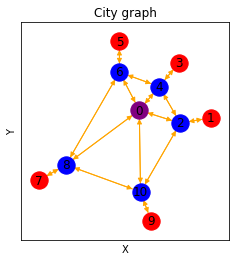

In [4]:
# file path
file_path = "sidermit_city.PAJEK"

# build city graph with a pajek file
graph_obj = Graph.build_from_file(file_path)

# plot graph and save figure in a file_path
graph_obj.plot("sidermit_city.png")

In [5]:
# file path
file_path = "sidermit_city.PAJEK"

# build city graph with a pajek file
graph_obj = Graph.build_from_file(file_path)

# get parameters information

n, L, g, P, etha, etha_zone, angles, Gi, Hi = graph_obj.get_parameters()

print("parameters information")
print("n: {}, L: {}, g: {}, P: {}".format(n, L, g, P))
print("etha: {}, etha_zone: {}".format(etha, etha_zone))
print("angles: {}".format(angles))
print("Gi: {}, Hi: {}".format(Gi, Hi))

# get information of the graph
zones = graph_obj.get_zones()
nodes = graph_obj.get_nodes()
edges = graph_obj.get_edges()

print("")
print("zones information")
for zone in zones:
    print("zone: {}, subcenter: {}, periphery: {}".format(zone.id, zone.subcenter.name, zone.periphery.name))

print("")
print("nodes information")
for node in nodes:
    print("node: {}, id: {}, x: {:.2f}, y: {:.2f}".format(node.name, node.id, node.x, node.y))

# to get a dictionary with node distance if exist a edge in the graph
edge_distance = graph_obj.get_edges_distance()
print("")
print("edges information")
for edge in edges:
    print("id: {}, node_i: {}, node_j: {}, distance: {:.2f}".format(edge.id, edge.node1.name, edge.node2.name, edge_distance[str(edge.node1.id)][str(edge.node2.id)]))







parameters information
n: 5, L: 10.0, g: 0.5, P: 2.0
etha: 0.5, etha_zone: 2
angles: [9.999999999999975, 50.0, 90.0, 210.0, 290.0]
Gi: [0.9999999999999998, 1.0, 1.0, 1.0, 1.0], Hi: [1.0, 1.0, 1.0, 1.0, 1.0]

zones information
zone: 1, subcenter: SC_1, periphery: P_1
zone: 2, subcenter: SC_2, periphery: P_2
zone: 3, subcenter: SC_3, periphery: P_3
zone: 4, subcenter: SC_4, periphery: P_4
zone: 5, subcenter: SC_5, periphery: P_5

nodes information
node: CBD, id: 0, x: 3.21, y: 3.83
node: P_1, id: 1, x: 14.77, y: 2.60
node: SC_1, id: 2, x: 9.85, y: 1.74
node: P_2, id: 3, x: 9.64, y: 11.49
node: SC_2, id: 4, x: 6.43, y: 7.66
node: P_3, id: 5, x: 0.00, y: 15.00
node: SC_3, id: 6, x: 0.00, y: 10.00
node: P_4, id: 7, x: -12.99, y: -7.50
node: SC_4, id: 8, x: -8.66, y: -5.00
node: P_5, id: 9, x: 5.13, y: -14.10
node: SC_5, id: 10, x: 3.42, y: -9.40

edges information
id: 1, node_i: P_1, node_j: SC_1, distance: 5.00
id: 2, node_i: SC_1, node_j: P_1, distance: 5.00
id: 3, node_i: SC_1, node_j: C

# 2. demand.py

In [6]:
from sidermit.city import Demand

# symetric parameters graph
n=5 
L=10 #[km]
g=0.5
P=2 #[km]

# asymetric parameters graph
etha = 0.5
etha_zone = 2
angles = [10, 50, 90, 210, 290]
Gi = [1, 1, 1, 1, 1]
Hi = [1, 1, 1, 1, 1]

# build city graph with parameters
graph_obj = Graph.build_from_parameters(n, L, g, P, etha=etha, etha_zone=etha_zone, angles=angles, Gi=Gi, Hi=Hi)

# symmetric parameters demand
Y = 10000
a = 0.5
alpha = 1/3
beta = 1/3

# build OD matrix with symmetric parameters
demand_obj = Demand.build_from_parameters(graph_obj, Y, a, alpha, beta)

# to get matrix like as a dictionary: keys: [node_id_O][node_id_D]; value: vij
matrixOD = demand_obj.get_matrix()

# matrix information
for node_id_O in matrixOD:
    for node_id_D in matrixOD[node_id_O]:
        vij =  matrixOD[node_id_O][node_id_D]
        print("Origin_id: {}, Destination_id: {}, vij: {:.2f}".format(node_id_O, node_id_D, vij))
        
# save matrix in a file
demand_obj.matrix_to_file("matrix_od.csv")


Origin_id: 0, Destination_id: 0, vij: 0.00
Origin_id: 0, Destination_id: 1, vij: 0.00
Origin_id: 0, Destination_id: 2, vij: 0.00
Origin_id: 0, Destination_id: 3, vij: 0.00
Origin_id: 0, Destination_id: 4, vij: 0.00
Origin_id: 0, Destination_id: 5, vij: 0.00
Origin_id: 0, Destination_id: 6, vij: 0.00
Origin_id: 0, Destination_id: 7, vij: 0.00
Origin_id: 0, Destination_id: 8, vij: 0.00
Origin_id: 0, Destination_id: 9, vij: 0.00
Origin_id: 0, Destination_id: 10, vij: 0.00
Origin_id: 1, Destination_id: 0, vij: 333.33
Origin_id: 1, Destination_id: 1, vij: 0.00
Origin_id: 1, Destination_id: 2, vij: 333.33
Origin_id: 1, Destination_id: 3, vij: 0.00
Origin_id: 1, Destination_id: 4, vij: 83.33
Origin_id: 1, Destination_id: 5, vij: 0.00
Origin_id: 1, Destination_id: 6, vij: 83.33
Origin_id: 1, Destination_id: 7, vij: 0.00
Origin_id: 1, Destination_id: 8, vij: 83.33
Origin_id: 1, Destination_id: 9, vij: 0.00
Origin_id: 1, Destination_id: 10, vij: 83.33
Origin_id: 2, Destination_id: 0, vij: 500.00

In [7]:
# build from file
demand_obj = Demand.build_from_file(graph_obj, "matrix_od.csv")

# change value vij
demand_obj.change_vij("0", "1", 500)

# to get matrix like as a dictionary: keys: [node_id_O][node_id_D]; value: vij
matrixOD = demand_obj.get_matrix()

# matrix information
vij =  matrixOD["0"]["1"]
print("Origin_id: {}, Destination_id: {}, vij: {:.2f}".format("0", "1", vij))


Origin_id: 0, Destination_id: 1, vij: 500.00


# 3. mode.py 

In [8]:
from sidermit.publictransportsystem import TransportMode, TransportModeManager

# build a Transport mode with parameters
name = "train"
bya = 1 #boarding and alighting (take value 0 or 1)
co = 2
c1 = 2
c2 = 2
v = 20
t = 4
fmax = 50
kmax = 500
theta = 0.5
tat = 5
d = 2

train_obj = TransportMode(name, bya, co, c1, c2, v, t, fmax, kmax, theta, tat, d)

# build default mode
[bus_obj, metro_obj] = TransportMode.get_default_modes()

# print information
print("name: {}, fmax: {}, kmax: {}".format(train_obj.name, train_obj.fmax, train_obj.kmax))
print("name: {}, fmax: {}, kmax: {}".format(bus_obj.name, bus_obj.fmax, bus_obj.kmax))
print("name: {}, fmax: {}, kmax: {}".format(metro_obj.name, metro_obj.fmax, metro_obj.kmax))

# build a mode_manager
# in mode manager default value to add_default_mode is True
# with that list of transport mode of the mode_manager start with bus_obj and metro_obj
# in this case add_default_mode=False for that list of transport mode is empty
mode_manager = TransportModeManager(add_default_mode=False)

# add mode_obj
mode_manager.add_mode(bus_obj)
mode_manager.add_mode(metro_obj)
mode_manager.add_mode(train_obj)

# get all modes
modes_obj = mode_manager.get_modes()
print("numbers of modes created: {}".format(len(modes_obj)))

# delete a mode_obj
mode_manager.remove_mode("metro")
modes_obj = mode_manager.get_modes()
print("numbers of modes created: {}".format(len(modes_obj)))

# list of names
names_modes_obj = mode_manager.get_modes_names()
print("modes_obj name: {}".format(names_modes_obj))

# get only a mode
train_obj = mode_manager.get_mode("train")
print("name: {}, fmax: {}, kmax: {}".format(train_obj.name, train_obj.fmax, train_obj.kmax))


print()
# mode defined are valid or not to assignment stop:
if mode_manager.is_valid_to_assignment_step():
    print("List of defined modes is valid to assigment step")
else:
    print("List of defined modes is not valid to assigment step")
    print("There should be only one or two transport mode. If there are two transport mode, one of them must have parameter d equal to 1")

# mode manager with default modes
mode_manager = TransportModeManager(add_default_mode=True)

print()
# mode defined are valid or not to assignment stop:
if mode_manager.is_valid_to_assignment_step():
    print("List of defined modes is valid to assigment step")
else:
    print("List of defined modes is not valid to assigment step")
    print("There should be only one or two transport mode. If there are two transport mode, one of them must have parameter d equal to 1")


name: train, fmax: 50, kmax: 500
name: bus, fmax: 150, kmax: 160
name: metro, fmax: 40, kmax: 1440
numbers of modes created: 3
numbers of modes created: 2
modes_obj name: ['bus', 'train']
name: train, fmax: 50, kmax: 500

List of defined modes is not valid to assigment step
There should be only one or two transport mode. If there are two transport mode, one of them must have parameter d equal to 1

List of defined modes is valid to assigment step


# 4. passenger.py

In [9]:
from sidermit.publictransportsystem import passenger

# build a passenger with parameters
va = 6
pv = 1
pw = 2
pa = 3
pt = 4
spv = 1
spw = 2
spa = 3
spt = 4

passenger_obj = passenger.Passenger(va, pv, pw, pa, pt, spv, spw, spa, spt)

print("v: {}".format(passenger_obj.va))

# build default passenger
passenger_obj = passenger.Passenger.get_default_passenger()

print("v: {}".format(passenger_obj.va))


v: 6
v: 4.0


# 5. network.py

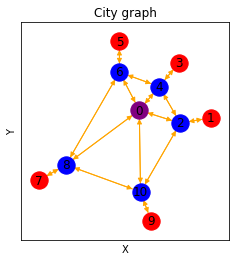

In [10]:
from sidermit.publictransportsystem import TransportNetwork, Route

# symetric parameters graph city
n=5 
L=10 #[km]
g=0.5
P=2 #[km]

# asymetric parameters graph city
etha = 0.5
etha_zone = 2
angles = [10, 50, 90, 210, 290]
Gi = [1, 1, 1, 1, 1]
Hi = [1, 1, 1, 1, 1]

# build city graph with asimmetryc parameters
graph_obj = Graph.build_from_parameters(n, L, g, P, etha=etha, etha_zone=etha_zone, angles=angles, Gi=Gi, Hi=Hi)

# build a network without routes
network_obj = TransportNetwork(graph_obj)

network_obj.plot("sidermit.png")


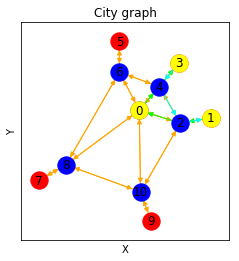

In [11]:
# build a custom route
route_id = "custom_route"
mode_obj = TransportMode("custom_mode", 0, 1, 1, 2, 30, 2, 30, 400, 1, 0, 1)
# string with node_id sequences
nodes_sequence_i = "1,2,0,4,3"
nodes_sequence_r = "3,4,2,1"
# string with node_id sequences
stops_sequence_i = "1,0,3"
stops_sequence_r = "3,1"
# custom route
custom_route = Route(route_id, mode_obj, nodes_sequence_i, nodes_sequence_r, stops_sequence_i, stops_sequence_r)

# add route 
network_obj.add_route(custom_route)

# plot network
network_obj.plot("sidermit.png")

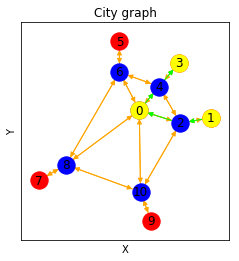

In [12]:
# plot only a direction ("I" or "R")
network_obj.plot("sidermit.png", direction="I")

In [13]:
# get predefined routes

# get default modes_obj
[bus_obj, metro_obj] = TransportMode.get_default_modes()

# predefined routes
feeder_route = network_obj.get_feeder_routes(mode_obj=bus_obj)
circular_route = network_obj.get_circular_routes(mode_obj=metro_obj)
radial_route = network_obj.get_radial_routes(mode_obj=metro_obj, short=False, express=False)
diametral_route = network_obj.get_diametral_routes(mode_obj=bus_obj, jump=2, short=False, express=False)
tangencial_route = network_obj.get_tangencial_routes(mode_obj=bus_obj, jump=2, short=False, express=False)

# get information of the routes
print("feeder routes: {}".format(len(feeder_route)))
print("circular routes: {}".format(len(circular_route)))
print("radial routes: {}".format(len(radial_route)))
print("diametral routes: {}".format(len(diametral_route)))
print("tangencial routes: {}".format(len(tangencial_route)))

print()
for route in tangencial_route:
    print("route_id: {}".format(route.id))
    print("\tmode_name: {}".format(route.mode.name))
    print("\tnode_sequence_i: {}".format(route.nodes_sequence_i))
    print("\tstop_sequence_i: {}".format(route.stops_sequence_i))
    print("\tnode_sequence_r: {}".format(route.nodes_sequence_r))
    print("\tstop_sequence_r: {}".format(route.stops_sequence_r))
# add diametral and circular routes to network_obj
for route in diametral_route:
    network_obj.add_route(route)
for route in circular_route:
    network_obj.add_route(route)

# get all routes in network:obj
routes = network_obj.get_routes()

print()
print("numbers of routes in network: {}".format(len(routes)))

# print routes_id in network
print()
print("routes_id created")
for route in routes:
    print(route.id)
        
# delete a route_id

network_obj.remove_route("custom_route")

routes = network_obj.get_routes()

print()
print("numbers of routes in network: {}".format(len(routes)))


feeder routes: 5
circular routes: 2
radial routes: 5
diametral routes: 5
tangencial routes: 5

route_id: T2_bus_1
	mode_name: bus
	node_sequence_i: ['1', '2', '4', '6', '5']
	stop_sequence_i: ['1', '2', '4', '6', '5']
	node_sequence_r: ['5', '6', '4', '2', '1']
	stop_sequence_r: ['5', '6', '4', '2', '1']
route_id: T2_bus_2
	mode_name: bus
	node_sequence_i: ['3', '4', '6', '8', '7']
	stop_sequence_i: ['3', '4', '6', '8', '7']
	node_sequence_r: ['7', '8', '6', '4', '3']
	stop_sequence_r: ['7', '8', '6', '4', '3']
route_id: T2_bus_3
	mode_name: bus
	node_sequence_i: ['5', '6', '8', '10', '9']
	stop_sequence_i: ['5', '6', '8', '10', '9']
	node_sequence_r: ['9', '10', '8', '6', '5']
	stop_sequence_r: ['9', '10', '8', '6', '5']
route_id: T2_bus_4
	mode_name: bus
	node_sequence_i: ['7', '8', '10', '2', '1']
	stop_sequence_i: ['7', '8', '10', '2', '1']
	node_sequence_r: ['1', '2', '10', '8', '7']
	stop_sequence_r: ['1', '2', '10', '8', '7']
route_id: T2_bus_5
	mode_name: bus
	node_sequence_i: 

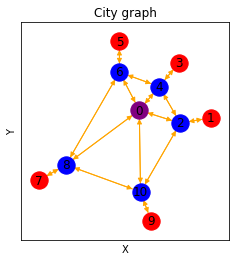

In [14]:
# print only city graph
network_obj.plot("sidermit.png", list_routes=[])

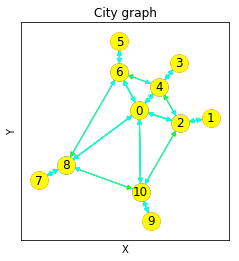

In [15]:
# print all routes and city graph
network_obj.plot("sidermit.png")

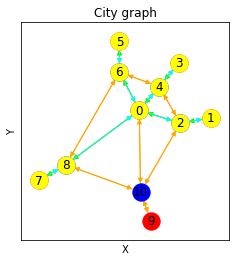

In [16]:
# print list of routes and city graph
network_obj.plot("sidermit.png", list_routes=["D2_bus_1", "D2_bus_2"])

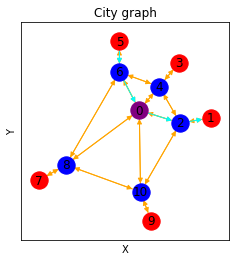

In [17]:
# print list of routes, city graph and a particular direction "I" or "R"
network_obj.plot("sidermit.png", list_routes=["D2_bus_1"], direction="R")

# 6. extended_graph.py

In [18]:
from sidermit.city import Graph
from sidermit.publictransportsystem import TransportNetwork, TransportModeManager, Passenger

# Import extended graph module
from sidermit.preoptimization import ExtendedGraph


# symetric parameters graph city
n=5 
L=10 #[km]
g=0.5
P=2 #[km]

# asymetric parameters graph city
etha = 0.5
etha_zone = 2
angles = [10, 50, 90, 210, 290]
Gi = [1, 1, 1, 1, 1]
Hi = [1, 1, 1, 1, 1]

# build city graph with asimmetryc parameters
graph_obj = Graph.build_from_parameters(n, L, g, P, etha=etha, etha_zone=etha_zone, angles=angles, Gi=Gi, Hi=Hi)

# get default modes_obj
[bus_obj, metro_obj] = TransportMode.get_default_modes()

# get default passenger
passenger_obj = Passenger.get_default_passenger()

# build a network without routes
network_obj = TransportNetwork(graph_obj)

# predefined routes
feeder_route = network_obj.get_feeder_routes(mode_obj=bus_obj)
circular_route = network_obj.get_circular_routes(mode_obj=metro_obj)
radial_route = network_obj.get_radial_routes(mode_obj=metro_obj, short=False, express=False)
diametral_route = network_obj.get_diametral_routes(mode_obj=bus_obj, jump=2, short=False, express=False)
tangencial_route = network_obj.get_tangencial_routes(mode_obj=bus_obj, jump=2, short=False, express=False)

# add diametral and circular routes to network_obj
for route in diametral_route:
    network_obj.add_route(route)
for route in circular_route:
    network_obj.add_route(route)
    
# build extended graph
# parameters frequency_routes is a dictionary: dic[route_id] = frequency route [veh/hr],
# if value is None then frequency for all routes is 28 [veh/hr]
extended_graph = ExtendedGraph(graph_obj, network_obj.get_routes(), passenger_obj.spt, frequency_routes=None)
print(extended_graph.__str__())


City node
-Graph node name: P_1
	Access edge
	-Access time: 0.00 [min]
		Stop node
		-Mode name: bus
			Boarding edge
			-Frequency: 7.00 [veh/h]
				Route node
				-Route_id: D2_bus_1
				-Direction: I
				-Previous stop: no data
				-Time to previous stop: 0.00 [hrs]
			Alighting edge
			-Penalty transfer: 16.00 [min]
				Route node
				-Route_id: D2_bus_1
				-Direction: R
				-Previous stop: SC_1
				-Time to previous stop: 0.25000000000000006 [hrs]
			Alighting edge
			-Penalty transfer: 16.00 [min]
				Route node
				-Route_id: D2_bus_4
				-Direction: I
				-Previous stop: SC_1
				-Time to previous stop: 0.25000000000000006 [hrs]
			Boarding edge
			-Frequency: 7.00 [veh/h]
				Route node
				-Route_id: D2_bus_4
				-Direction: R
				-Previous stop: no data
				-Time to previous stop: 0.00 [hrs]
City node
-Graph node name: SC_1
	Access edge
	-Access time: 0.00 [min]
		Stop node
		-Mode name: bus
			Boarding edge
			-Frequency: 7.00 [veh/h]
			Alighting edge
			-Penalty transfer

# 7. hyper_path.py

In [19]:
from sidermit.city import Graph
from sidermit.publictransportsystem import TransportNetwork, TransportModeManager, Passenger
from sidermit.preoptimization import ExtendedGraph

# Import Hyperpath module
from sidermit.preoptimization import Hyperpath

# symetric parameters graph city
n=2 
L=10 #[km]
g=0.5
P=2 #[km]

# build city graph
graph_obj = Graph.build_from_parameters(n, L, g, P)

# build Od_matrix with parameters
demand_obj = Demand.build_from_parameters(graph_obj=graph_obj, y=1000, a=0.5, alpha=1 / 3, beta=1 / 3)
OD_matrix = demand_obj.get_matrix()

# get default modes_obj
[bus_obj, metro_obj] = TransportMode.get_default_modes()

# get default passenger
passenger_obj = Passenger.get_default_passenger()

# build a network without routes
network_obj = TransportNetwork(graph_obj)

# predefined routes
feeder_routes = network_obj.get_feeder_routes(bus_obj)
radial_routes = network_obj.get_radial_routes(metro_obj, short=True)
radial_routes_bus = network_obj.get_radial_routes(bus_obj)
circular_routes = network_obj.get_circular_routes(bus_obj)

# add predefined routes
for route in feeder_routes:
    network_obj.add_route(route)

for route in radial_routes:
    network_obj.add_route(route)

for route in circular_routes:
    network_obj.add_route(route)

for route in radial_routes_bus:
    network_obj.add_route(route)
    
# build extended graph
# parameters frequency_routes is a dictionary: dic[route_id] = frequency route [veh/hr],
# if value is None then frequency for all routes is 28 [veh/hr]
extended_graph = ExtendedGraph(graph_obj, network_obj.get_routes(), passenger_obj.spt, frequency_routes=None)

# get periphery node of the zone with id 1 and cbd node to get a hyperpath between these nodes
extended_graph_nodes = extended_graph.get_extended_graph_nodes()
P1 = None
CBD = None
for city_node in extended_graph_nodes:
    if str(city_node.graph_node.name) == "CBD":
        CBD = city_node
    if str(city_node.graph_node.name) == "P_1":
        P1 = city_node

# build hyperpath graph and print 
hyperpath_obj = Hyperpath(extended_graph, passenger_obj)
successors, label, frequencies = hyperpath_obj.build_hyperpath_graph(P1, CBD)
print(hyperpath_obj.string_hyperpath_graph(successors, label, frequencies))



HyperPath Graph
City_node
	-Graph_node_name: P_1
	-label: inf
	-Successor: 
	-Frequencies: 0.00
Stop_node
	-Mode_name: bus
	-Graph_node_name: P_1
	-label: 0.93
	-Successor: [ExtendedEdgesType.BOARDING: Stopnode bus: P_1 - Routenode R_bus_1 I: P_1] [ExtendedEdgesType.BOARDING: Stopnode bus: P_1 - Routenode F_bus_1 I: P_1] 
	-Frequencies: 14.00
Route_node
	-route_id: F_bus_1
	-direction: I
	-Graph_node_name: P_1
	-label: 0.90
	-Successor: [ExtendedEdgesType.ROUTE: Routenode F_bus_1 I: P_1 - Routenode F_bus_1 I: SC_1] 
	-Frequencies: 0.00
Route_node
	-route_id: F_bus_1
	-direction: R
	-Graph_node_name: P_1
	-label: 1.19
	-Successor: [ExtendedEdgesType.ALIGHTING: Routenode F_bus_1 R: P_1 - Stopnode bus: P_1] 
	-Frequencies: 0.00
Route_node
	-route_id: R_bus_1
	-direction: I
	-Graph_node_name: P_1
	-label: 0.75
	-Successor: [ExtendedEdgesType.ROUTE: Routenode R_bus_1 I: P_1 - Routenode R_bus_1 I: SC_1] 
	-Frequencies: 0.00
Route_node
	-route_id: R_bus_1
	-direction: R
	-Graph_node_name: P_1

In [20]:
# build hyperpath graph
hyperpath_obj = Hyperpath(extended_graph, passenger_obj)
successors, label, frequencies = hyperpath_obj.build_hyperpath_graph(P1, CBD)

# get all elemental path in each stop of the origin in a OD pair and print
hyperpaths_od, label, successors, frequencies = hyperpath_obj.get_hyperpath_OD(P1, CBD)
string_HP_OD = hyperpath_obj.string_hyperpaths_OD(hyperpaths_od, label)
print(string_HP_OD)



bus stop

	New Path:
		[City_node P_1: inf]
		[Stop_node bus - P_1: 0.9262]
		[Route_node R_bus_1 I - P_1: 0.7500]
		[Route_node R_bus_1 I - SC_1: 0.5000]
		[Route_node R_bus_1 I - CBD: 0.0000]
		[Stop_node bus - CBD: 0.0000]
		[City_node CBD: 0.0000]
		
	New Path:
		[City_node P_1: inf]
		[Stop_node bus - P_1: 0.9262]
		[Route_node F_bus_1 I - P_1: 0.9024]
		[Route_node F_bus_1 I - SC_1: 0.6524]
		[Stop_node bus - SC_1: 0.3857]
		[City_node SC_1: 0.3857]
		[Stop_node metro - SC_1: 0.3357]
		[Route_node RS_metro_1 I - SC_1: 0.3000]
		[Route_node RS_metro_1 I - CBD: 0.0500]
		[Stop_node metro - CBD: 0.0500]
		[City_node CBD: 0.0000]
		


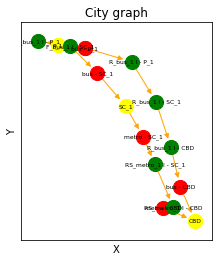

In [21]:
# plot a representation of all hyperpath for a OD pair
hyperpath_obj.plot(hyperpaths_od)

In [22]:
# get all hyperpaths for each OD pair with trips in OD_matrix and print
hyperpaths, labels, successors, frequency, Vij = hyperpath_obj.get_all_hyperpaths(OD_matrix)
print(hyperpath_obj.string_all_hyperpaths(hyperpaths, labels, successors, Vij))


origin: P_1, destination: CBD, vij: 83.33
	 mode: bus, label: 0.93 [EIV], n° elemental paths: 2, n° elemental paths (successors): 2
origin: P_1, destination: SC_1, vij: 83.33
	 mode: bus, label: 0.35 [EIV], n° elemental paths: 2, n° elemental paths (successors): 2
origin: P_1, destination: SC_2, vij: 83.33
	 mode: bus, label: 1.53 [EIV], n° elemental paths: 2, n° elemental paths (successors): 2
origin: SC_1, destination: CBD, vij: 125.00
	 mode: bus, label: 0.70 [EIV], n° elemental paths: 1, n° elemental paths (successors): 1
origin: SC_1, destination: CBD, vij: 125.00
	 mode: metro, label: 0.39 [EIV], n° elemental paths: 1, n° elemental paths (successors): 1
origin: SC_1, destination: SC_2, vij: 125.00
	 mode: bus, label: 1.10 [EIV], n° elemental paths: 2, n° elemental paths (successors): 2
origin: SC_1, destination: SC_2, vij: 125.00
	 mode: metro, label: 0.94 [EIV], n° elemental paths: 1, n° elemental paths (successors): 1
origin: P_2, destination: CBD, vij: 83.33
	 mode: bus, labe

# 8. assignment.py

In [23]:
# to import module
from sidermit.preoptimization import Assignment

# to build dictionary objects
from collections import defaultdict

# to build graph
graph_obj = Graph.build_from_parameters(n=2, l=10, g=0.5, p=2)
# to build demand
demand_obj = Demand.build_from_parameters(graph_obj=graph_obj, y=100, a=0.5, alpha=1 / 3, beta=1 / 3)
# to build passenger
passenger_obj = Passenger.get_default_passenger()
# to build default transport mode
[bus_obj, metro_obj] = TransportMode.get_default_modes()

# to build network
network_obj = TransportNetwork(graph_obj=graph_obj)

# to get routes
feeder_routes_metro = network_obj.get_feeder_routes(mode_obj=metro_obj)
radial_routes_bus = network_obj.get_radial_routes(mode_obj=bus_obj)

# to add routes
for route in feeder_routes_metro:
    network_obj.add_route(route_obj=route)

for route in radial_routes_bus:
    network_obj.add_route(route_obj=route)
    

# to build extended graph
extended_graph_obj = ExtendedGraph(graph_obj=graph_obj, routes=network_obj.get_routes(), sPTP=passenger_obj.spt, frequency_routes=None)

# to build hyperpath
hyperpath_obj = Hyperpath(extended_graph_obj=extended_graph_obj, passenger_obj=passenger_obj)

# to get all hyperpaths between all OD pair with trips in OD matrix
hyperpaths, labels, successors, frequency, Vij = hyperpath_obj.get_all_hyperpaths(OD_matrix=demand_obj.get_matrix())

# to get a dictionary with assignment percent of trips between each Transport Mode in each OD pair with trips
# OD_assignment = dic[origin: CityNode][destination: CityNode][Stop: StopNode] = %V_OD
OD_assignment = Assignment.get_assignment(hyperpaths=hyperpaths, labels=labels, Vij=Vij, p=2,
                                          vp=passenger_obj.va, spa=passenger_obj.spa,
                                          spv=passenger_obj.spv)

# to get all nodes in extended graph
# nodes = dic[CityNode][StopNode] = List[RouteNode]
nodes = extended_graph_obj.get_extended_graph_nodes()


# to get a specific node in extended graph
P1 = None
SC1 = None
CBD = None

stop_bus_p1 = None
stop_metro_p1 = None

for city_node in nodes:
    if city_node.graph_node.name == "P_1":
        P1 = city_node
    if city_node.graph_node.name == "SC_1":
        SC1 = city_node
    if city_node.graph_node.name == "CBD":
        CBD = city_node

    for stop_node in nodes[city_node]:
        if stop_node.mode.name == "bus":
            if city_node.graph_node.name == "P_1":
                stop_bus_p1 = stop_node

        if stop_node.mode.name == "metro":
            if city_node.graph_node.name == "P_1":
                stop_metro_p1 = stop_node


print("Trips Assignment bus, origin P1, destination CBD: {}".format(OD_assignment[P1][CBD][stop_bus_p1]))
print("Trips Assignment bus, origin P1, destination CBD: {}".format(OD_assignment[P1][SC1][stop_bus_p1]))
print("Trips Assignment Metro, origin P1, destination CBD: {}".format(OD_assignment[P1][SC1][stop_metro_p1]))

# build a dictionary where all route_id defined in network have a defined frequency
f = defaultdict(float)
for route in network_obj.get_routes():
    f[route.id] = 28

# to get alighting [pax/veh] and boarding [pax/veh] for all routes, direction in each stop 
# z = dic[route_id][direction][stop: StopNode] = pax [pax/veh]
# v = dic[route_id][direction][stop: StopNode] = pax [pax/veh]
z, v = Assignment.get_alighting_and_boarding(Vij=Vij, hyperpaths=hyperpaths, successors=successors,
                                                     assignment=OD_assignment, f=f)

# to print boarding and alighting information
print(Assignment.str_boarding_alighting(z, v))

# to print a specific boarding and alighting information
print("\nBoarding in Feeder_metro_1, direction I, Stop P_1: {}".format(z["F_metro_1"]["I"][stop_metro_p1]))




Trips Assignment bus, origin P1, destination CBD: 100
Trips Assignment bus, origin P1, destination CBD: 49.88095238095238
Trips Assignment Metro, origin P1, destination CBD: 50.11904761904762

Boarding and Alighting information:
New route: R_bus_1
	Boarding:
		Direction: I
			Stop bus-P_1: 0.19[pax/veh]
			Stop bus-SC_1: 0.22[pax/veh]
		Direction: R
			Stop bus-CBD: 0.19[pax/veh]
	Alighting:
		Direction: I
			Stop bus-CBD: 0.37[pax/veh]
			Stop bus-SC_1: 0.04[pax/veh]
		Direction: R
			Stop bus-SC_1: 0.19[pax/veh]
New route: F_metro_1
	Boarding:
		Direction: I
			Stop metro-P_1: 0.15[pax/veh]
	Alighting:
		Direction: I
			Stop metro-SC_1: 0.15[pax/veh]
New route: R_bus_2
	Boarding:
		Direction: R
			Stop bus-CBD: 0.19[pax/veh]
		Direction: I
			Stop bus-P_2: 0.19[pax/veh]
			Stop bus-SC_2: 0.22[pax/veh]
	Alighting:
		Direction: R
			Stop bus-SC_2: 0.19[pax/veh]
		Direction: I
			Stop bus-CBD: 0.37[pax/veh]
			Stop bus-SC_2: 0.04[pax/veh]
New route: F_metro_2
	Boarding:
		Direction: I
	